# **PREDIKSI HARGA LAPTOP BERDASARKAN FITUR-FITUR YANG ADA PADA LAPTOP**

# **Import Library dan Resource yang akan digunakan**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **BUSINESS UNDERSTANDING**

# **Business Objective**

Tujuan dari dataset ini adalah untuk membantu perusahaan dalam harga laptop, sehingga produk tidak terlalu mahal atau terlalu murah dipasaran dan juga untuk memberikan pemahaman yang lebih baik mengenai preferensi konsumen terhadap fitur-fitur laptop, sehingga memungkinkan perusahaan untuk membuat produk yang sesuai dengan keinginan pelanggan dan kebutuhan pasar.

# **Assess Situation**

Situasi bisnis ini menggambarkan keinginan untuk lebih memahami faktor-faktor yang berkontribusi pada penentuan harga laptop. Adanya simulasi harga menunjukkan upaya untuk menguji seberapa baik variasi fitur dapat mempengaruhi harga secara keseluruhan, sehingga diharapkan dapat membantu perusahaan untuk menetapkan harga yang lebih akurat dan bersaing dipasar.

# **Data Mining Goals**

Tujuan dari data mining pada proyek prediksi harga laptop berdasarkan fitur-fiturnya adalah sebagai berikut:

mengidentifikasi pola hubungan yang mungkin ada antara fitur-fitur laptop seperti merek, kecepatan prosesor, ukuran RAM, kapasitas penyimpanan, ukuran layar, dan berat dengan harga. Hal ini bertujuan untuk bertujuan untuk memahami bagaimana fitur-fitur tersebut berperan dalam menentukan harga.

mengembangkan model prediktif yang dapat memberikan estimasi harga laptop berdasarkan fiturnya.

menemukan fitur-fitur yang memiliki pengaruh signifikan terhadap harga, membantu perusahaan untuk lebih fokus dalam mengembangkan produk.

# **Project Plan**

Rencana proyek ini dimulai dengan pengumpulan data, kemudian mengidentifikasi dan memperoleh dataset yang mencakup informasi harga laptop, merek, kecepatan prosesor, ukuran RAM, kapasitas penyimpanan, ukuran layar, dan berat. Setelah itu, akan dilakukan pemahaman awal terhadap data untuk mengidentifikasi karakteristik dan mengatasi nilai yang hilang. Langkah selanjutnya adalah persiapan data, dimana kami akan membersihkan dan memproses data agar siap digunakan, setelah itu memilih dan mengimplementasikan algoritma pembelajaran mesin yang tepat untuk memprediksi harga laptop berdasarkan fiturnya.

# **DATA UNDERSTANDING**

# **Collect Initial Data**

Sumber data yang saya ambil disini adalah dari kaggle dengan judul Laptop Price Prediction. Kumpulan data ini mengemulasikan harga laptop, menangkap berbagai fitur yang umumnya dikaitkan dengan laptop dan simulasi harga terkaitnya. Kumpulan data tersebut mencakup atribut utama seperti merek, kecepatan prosesor, ukuran RAM, kapasitas penyimpanan, ukuran layar, dan berat. Berikut Link dari sumber yang diambil https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction

In [2]:
DATA_URL = '/content/Laptop_price.csv'

In [3]:
df = pd.read_csv(DATA_URL)

In [4]:
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# **Describe Data**

#### Informasi Dasar

In [12]:
df.shape

(1000, 8)

Dapat dilihat diatas bahwa df.shape menampilkan (1000, 7) dimana 1000 ini adalah jumlah baris yang ada pada dataset dan 7 adalah jumlah kolom yang ada pada dataset.

#### Informasi Lanjutan

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
 7   PriceCategory     1000 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 62.6+ KB


**Kolom Brand** : Memiliki 1000 baris dengan tipe data object.

**Kolom Processor_Speed** : Memiliki 1000 baris dengan tipe data float.

**Kolom RAM_Size** : Memiliki 1000 baris dengan tipe data integer.

**Kolom Storage_Capacity** : Memiliki 1000 baris dengan tipe data integer.

**Kolom Screen_Size** : Memiliki 1000 baris dengan tipe data float.

**Kolom Weight** : Memiliki 1000 baris dengan tipe data float.

**Kolom Price** : Memiliki 1000 baris dengan tipe data float.

#### Informasi Statistik Deskriptif

In [14]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


Dapat dilihat dari data diatas bahwa:

**Processor_Speed**
- count : terdapat 1000 data pada kolom Processor_Speed.
- mean : rata-rata kecepatan processor sekitar 2.75 GHz.
- std : Standar deviasi sekitar 0.73 GHz, menunjukkan sejauh mana data tersebar dari rata-rata.
- min : Kecepatan minimum processor adalah 1.51 GHz.
- 25% (Q1) : Kuartil pertama berada di sekitar 2.09 GHz.
- 50% (Median) : Median atau nilai tengah berada di sekitar 2.76 GHz.
- 75% (Q3) : Kuartil ketiga berada di sekitar 3.36 GHz.
- Max : Kecepatan maksimum processor adalah 3.99 GHz.

**RAM_Size**
- count : Terdapat 1000 entri data pada kolom RAM_Size.
- Mean : Rata-rata ukuran RAM sekitar 15.5 GB.
- Std : Standar deviasi sekitar 10.99 GB.
- Min : Ukuran minimum RAM adalah 4 GB.
- 25% (Q1) : Kuartil pertama berada di sekitar 8 GB.
- 50% (Median) : Median atau nilai tengah berada di sekitar 16 GB.
- 75% (Q3) : Kuartil ketiga berada di sekitar 32 GB.
- Max : Ukuran maksimum RAM adalah 32 GB.

**Storage_Capacity**
- Count : Terdapat 1000 entri data pada kolom Storage_Capacity.
- Mean : Rata-rata kapasitas penyimpanan sekitar 584.58 GB.
- Std : Standar deviasi sekitar 313.44 GB.
- Min : minimum kapasitas penyimpanan adalah 256 GB.
- 25% (Q1) : Kuartil pertama berada di sekitar 256 GB.
- 50% (Median) : Median atau nilai tengah berada di sekitar 512 GB.
- 75% (Q3) : Kuartil ketiga berada di sekitar 1000 GB (1 TB).
- Max : maksimum kapasitas penyimpanan adalah 1000 GB (1 TB).

**Screen_Size**
- Count : Terdapat 1000 entri data pada kolom Screen_Size.
- Mean : Rata-rata ukuran layar sekitar 14.06 inci.
- Std : Standar deviasi sekitar 1.71 inci.
- Min : Ukuran layar minimum adalah 11.01 inci.
- 25% (Q1) : Kuartil pertama berada di sekitar 12.64 inci.
- 50% (Median) : Median atau nilai tengah berada di sekitar 14.10 inci.
- 75% (Q3) : Kuartil ketiga berada di sekitar 15.53 inci.
- Max : Ukuran layar maksimum adalah 16.99 inci.

**Weight**
- Count : Terdapat 1000 entri data pada kolom Weight.
- Mean : Rata-rata berat produk sekitar 3.47 lbs.
- Std : Standar deviasi sekitar 0.87 lbs.
- Min : Berat produk minimum adalah 2.00 lbs.
- 25% (Q1) : Kuartil pertama berada di sekitar 2.72 lbs.
- 50% (Median) : Median atau nilai tengah berada di sekitar 3.46 lbs.
- 75% (Q3) : Kuartil ketiga berada di sekitar 4.21 lbs.
- Max : Berat produk maksimum adalah 4.99 lbs.

**Price**
- Count : Terdapat 1000 entri data pada kolom Price.
- Mean : Rata-rata harga produk sekitar $19604.19.
- Std : Standar deviasi sekitar 9406.06.
- Min: Harga produk minimum adalah 8570.01.
- 25% (Q1): Kuartil pertama berada di sekitar 10114.01.
- 50% (Median): Median atau nilai tengah berada di sekitar 17287.24.
- 75% (Q3): Kuartil ketiga berada di sekitar 31566.21.
- Max: Harga produk maksimum adalah 33503.94.


# **Exploratory Data Analysis**

In [ ]:
px.imshow(df.corr(numeric_only=True))

**Processor_Speed**
- Korelasi antara kolom Processor_Speed dan RAM_Size ada keterkaitan karena korelasi yang dihasilkan sebesar 0.02
- Korelasi antara kolom Processor_Speed dan Storage_Capacity tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.06
- Korelasi antara kolom Processor_Speed dan Screen_Size tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.01
- Korelasi antara kolom Processor_Speed dan Weight tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.05
- Korelasi antara kolom Processor_Speed dan Price tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.05

**RAM_Size**
- Korelasi antara kolom RAM_Size dan Storage_Capacity ada keterkaitan karena korelasi yang dihasilkan sebesar 0.002
- Korelasi antara kolom RAM_Size dan Screen_Size tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.03
- Korelasi antara kolom RAM_Size dan Weight tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.02
- Korelasi antara kolom RAM_Size dan Price ada keterkaitan karena korelasi yang dihasilkan sebesar 0.06

**Storage_Capacity**
- Korelasi antara kolom Storage_Capacity dan Screen_Size tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.02
- Korelasi antara kolom Storage_Capacity dan Weight ada keterkaitan karena korelasi yang dihasilkan sebesar 0.04
- Korelasi antara kolom Storage_Capacity dan Price ada keterkaitan karena korelasi yang dihasilkan sebesar 0.99

**Screen_Size**
- Korelasi antara kolom Screen_Size dan Weight ada keterkaitan karena korelasi yang dihasilkan sebesar 0.02
- Korelasi antara kolom Screen_Size dan Price tidak ada keterkaitan karena korelasi yang dihasilkan sebesar -0.02

**Weight**
- Korelasi antara kolom Weight dan Price ada keterkaitan karena korelasi yang dihasilkan sebesar 0.02

# **Verify Data Quality**

#### Missing Values

In [15]:
df.isnull().any()

Brand               False
Processor_Speed     False
RAM_Size            False
Storage_Capacity    False
Screen_Size         False
Weight              False
Price               False
PriceCategory       False
dtype: bool

Dapat dilihat dari data diatas bahwa semua kolom bernilai false yang dimana tidak ada nilai kosong pada setiap kolom.

#### Outliers Values

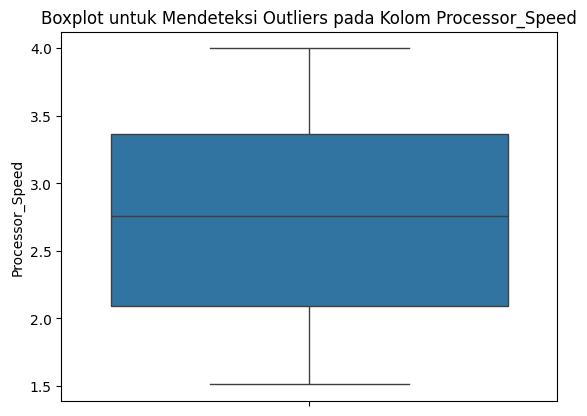

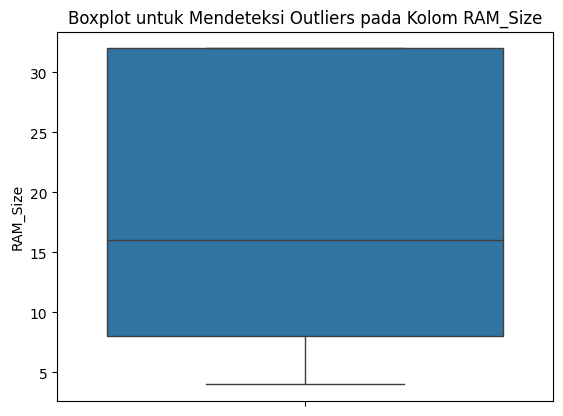

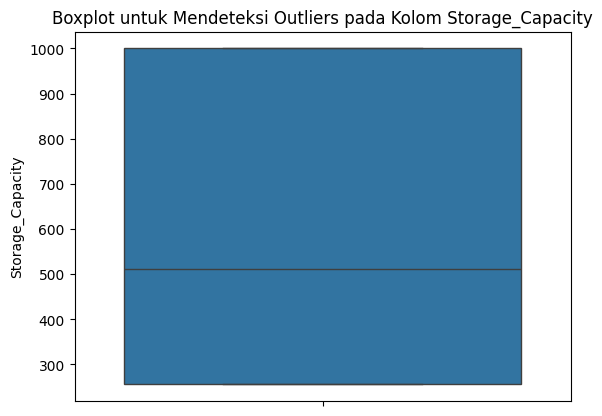

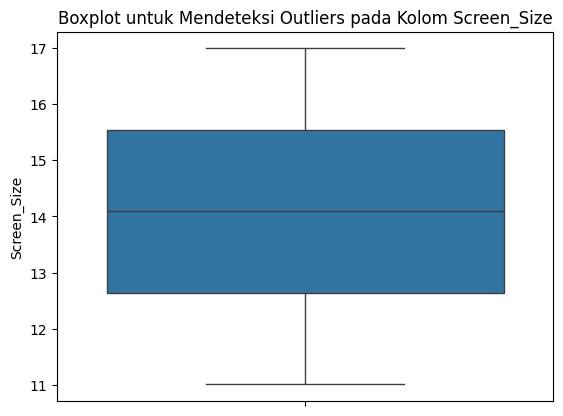

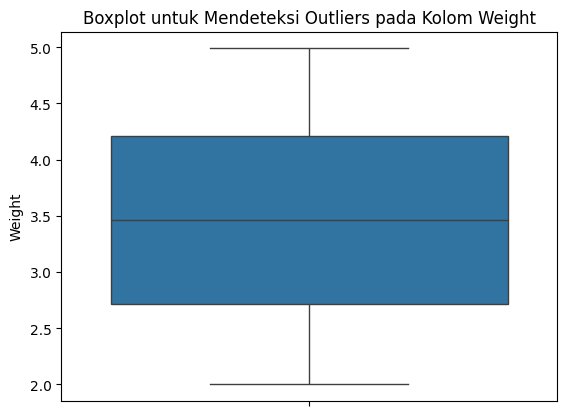

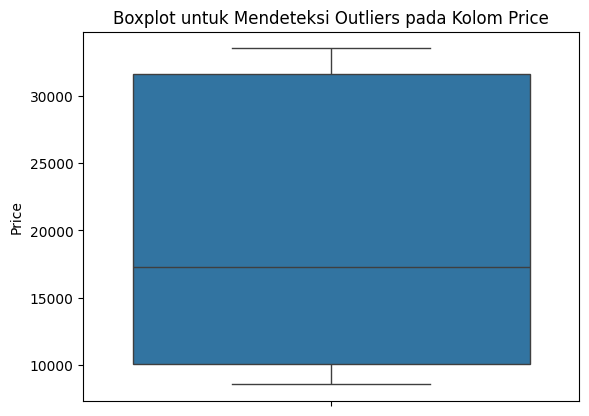

In [16]:
columns = ["Processor_Speed", "RAM_Size", "Storage_Capacity", "Screen_Size", "Weight", "Price"]

for col in columns:
    sns.boxplot(data=df [col])
    plt.title(f"Boxplot untuk Mendeteksi Outliers pada Kolom {col}")
    plt.show()

Hasil Pengecekan outliers menggunakan boxplot menunjukkan tidak ada nilai outliers pada masing-masing kolom.Hal ini dikarenakan tidak ada titik-titik di luar batas whisker pada semua kolom, sehingga data pada setiap kolom berdistribusi dengan baik.

In [17]:
# Fungsi untuk mendeteksi outliers menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Loop untuk mendeteksi outliers pada setiap kolom
for column in df.columns:
    if df[column].dtype != 'object':  # Hanya berlaku untuk kolom numerik
        outliers = detect_outliers_iqr(df[column])
        print(f"Kolom '{column}': Jumlah outliers = {outliers.sum()}")


Kolom 'Processor_Speed': Jumlah outliers = 0
Kolom 'RAM_Size': Jumlah outliers = 0
Kolom 'Storage_Capacity': Jumlah outliers = 0
Kolom 'Screen_Size': Jumlah outliers = 0
Kolom 'Weight': Jumlah outliers = 0
Kolom 'Price': Jumlah outliers = 0


Dari hasil pengecekan outliers dari setiap kolom menggunakan IQR menunjukkan bahwa semua kolom jumlah outliersnya adalah 0 sehingga semua kolom tidak memiliki nilai outliers.



#### Duplicated Values

In [ ]:
df[df.duplicated]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price


Dari data diatas menunjukkan bahwa tidak terdapat nilai yang terduplikat.

In [18]:
kolom_duplikat = df[df.duplicated()]
print(kolom_duplikat.any())

Brand               False
Processor_Speed     False
RAM_Size            False
Storage_Capacity    False
Screen_Size         False
Weight              False
Price               False
PriceCategory       False
dtype: bool


Dapat dilihat dari data diatas semua kolom bernilai False yang menunjukkan tidak ada nilai yang terduplikat. Apabila terdapat kolom yang bernilai True itu berarti adanya nilai yang terduplikat.

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

Dapat dilihat dari data diatas menunjukkan bahwa dari index 0 sampai index 999 bernilai false yang artinya tidak ada baris data yang terduplikat.

#### Inconsistent Values/Noise

In [ ]:
# Mengecek rentang nilai dalam setiap kolom
for column in df.columns:
    if df[column].dtype != 'object':  # Mengecek hanya kolom numerik
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"Kolom '{column}': Rentang nilai dari {min_value} hingga {max_value}")

Kolom 'Processor_Speed': Rentang nilai dari 1.511580057511507 hingga 3.9985343144266654
Kolom 'RAM_Size': Rentang nilai dari 4 hingga 32
Kolom 'Storage_Capacity': Rentang nilai dari 256 hingga 1000
Kolom 'Screen_Size': Rentang nilai dari 11.012111106489405 hingga 16.985736933508313
Kolom 'Weight': Rentang nilai dari 2.000559584511989 hingga 4.990727655768066
Kolom 'Price': Rentang nilai dari 8570.01295046808 hingga 33503.93503731473


# **Data Cleaning**

### **Penanganan Missing Values**

#### **Pengecekkan Missing Values**

Ini adalah output dalam persentase, yang bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong.

In [19]:
print((df.isna().sum() / len(df)) * 100)

Brand               0.0
Processor_Speed     0.0
RAM_Size            0.0
Storage_Capacity    0.0
Screen_Size         0.0
Weight              0.0
Price               0.0
PriceCategory       0.0
dtype: float64


Dapat dilihat dari output presentase diatas bahwa tidak terdapat nilai kosong pada kolom dikarenakan semua kolom bernilai 0, sehingga tidak diperlukan penghapusan ataupun imputasi Missing Values pada kolom.

### **Penanganan Duplicated Values**

#### **Pengecekkan Nilai Duplikat**

In [20]:
df[df.duplicated()]

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,PriceCategory


Dapat dilihat dari data pengecekan nilai duplikat diatas dikatakan bahwa tidak terdapat kolom yang terduplikat.

#### **Hapus Nilai Duplikat**

In [21]:
df = df.drop_duplicates()

### **Penanganan Outliers**

#### **Pengecekkan Outliers**

In [22]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Processor_Speed,0.0
RAM_Size,0.0
Storage_Capacity,0.0
Screen_Size,0.0
Weight,0.0
Price,0.0


Dapat dilihat dari output data presentase outliers diatas bahwa semua kolom tersebut adalah 0.0, yang berarti bahwa tidak ada nilai yang dianggap sebagai outliers dari dataset. Sehingga tidak diperlukan penghapusan ataupun imputasi outliers pada kolom.

Sehingga dapat disimpulkan bahwa tidak perlu dilakukan data cleaning dikarenakan semua datanya sudah bersih (tidak terdapat nilai kosong, duplikat dan outliers pada kolom).

# **Construct Data**

### **Melakukan Rekayasa Fitur (Feature Engineering)**

In [23]:
def categorize_price(price):
    if price < 500:
        return 'Low'
    elif 500 <= price < 1000:
        return 'Medium'
    else:
        return 'High'

df['PriceCategory'] = df['Price'].apply(categorize_price)


In [24]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,PriceCategory
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,High
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,High
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,High
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,High
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,High
...,...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017,High
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832,High
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779,High
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459,High


Dalam dataset setiap produk dikategorikan berdasarkan harganya. Produk dengan harga dibawah 500 diberi label Low, produk dengan harga antara 500 dan 1000 diberi label Medium dan produk dengan harga diatas 1000 diberi label High.

Sehingga Dari output data diatas dapat dilihat bahwa semua harga laptop dikategorikan sebagai High.

# **Data Reduction**

### **Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [10]:
df_corr = df.corr(numeric_only=True)
px.imshow(df_corr)

 Dari visualisasi diatas dapat dilihat bahwa semua fitur dianggap memiliki hubungan satu sama lain (berkorelasi)sehingga tidak perlu dilakukan reduksi.

# **Data Transformation**

### **Mapping**

In [25]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,PriceCategory
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,High
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,High
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,High
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,High
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,High
...,...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017,High
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832,High
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779,High
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459,High


Dari data diatas terlihat bahwa pada kolom 'PriceCategory' masih menggunakan nilai kategorikal sehingga perlu dilakukan mapping pada kolom 'PriceCategory'.

In [26]:
df['PriceCategory'] = df['PriceCategory'].map({'Low': 0, 'Medium': 1,'High': 2}).astype(int)

In [27]:
df

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,PriceCategory
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065,2
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919,2
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542,2
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334,2
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718,2
...,...,...,...,...,...,...,...,...
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017,2
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832,2
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779,2
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459,2


Data diatas adalah hasil dari mapping yang dilakukan terhadap kolom 'PriceCategory' agar menjadi kolom numerikal dengan nilai 0 untuk Low, nilai 1 untuk Medium dan nilai 2 untuk high.

### **Encoding**

Karena data diatas kolom Brand adalah kolom dengan nilai kategorikal maka perlu dilakukan encoding untuk mengubah kolom kategorikal menjadi representasi biner.

In [28]:
df = pd.get_dummies(df)

### **Pengecekkan Hasil**

In [29]:
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,PriceCategory,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,2,0,1,0,0,0
1,2.912833,4,1000,11.311372,3.260012,31607.605919,2,1,0,0,0,0
2,3.241627,4,256,11.853023,2.029061,9291.023542,2,0,0,0,0,1
3,3.806248,16,512,12.280360,4.573865,17436.728334,2,1,0,0,0,0
4,3.268097,32,1000,14.990877,4.193472,32917.990718,2,1,0,0,0,0


Kolom 'Brand' yang awalnya berisi nilai kategorikal telah diubah menjadi representasi biner, dengan menggunakan encoding.

Data di atas telah melalui proses encoding pada kolom 'Brand'. Setiap merek laptop, seperti Acer, Asus, Dell, HP, dan Lenovo, diwakili oleh kolom biner terpisah. Nilai 1 pada kolom tersebut menunjukkan kehadiran merek tersebut pada baris tertentu, sementara nilai 0 menandakan ketiadaan.

In [ ]:
from google.colab import files
df.to_csv('Data_Cleaned.csv', index=False)
files.download('Data_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Modelling Predict**

### **Select Modelling Techniques**

Pada dataset ini menggunakan Klasifikasi (Prediktif) dikarenakan judul analisis pada dataset ini menekankan pada prediksi harga laptop berdasarkan fitur-fiturnya, ini menunjukkan bahwa kita tertarik untuk membuat model yang dapat mengklasifikasikan atau memprediksi harga laptop ke dalam kategori tertentu berdasarkan fitur-fiturnya.
Pada dataset ini juga memiliki variabel target yang bersifat kategoris, yaitu "PriceCategory" yang menunjukkan bahwa kita ingin mengklasifikasikan atau memprediksi kategori harga (misalnya, harga rendah, sedang, atau tinggi) berdasarkan fitur-fitur laptop.
Oleh karena itu, pendekatan yang tepat adalah dengan  menggunakan model klasifikasi atau prediktif.

### **Pre-Processing**

##### **Split Data**

In [30]:
x = df.drop('PriceCategory', axis=1)
y = df['PriceCategory']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Kode di atas digunakan untuk mempersiapkan data untuk proses pemodelan, dimana
- x = df.drop('PriceCategory', axis=1) : Variabel x merupakan kumpulan fitur dari dataset, dimana 'PriceCategory' dihapus karena akan digunakan sebagai variabel target atau label dalam prediksi. fungsi drop untuk menghapus kolom dari dataframe.
- y = df['PriceCategory'] : Variabel Y adalah target atau label yang ingin diprediksi, yaitu kolom 'PriceCategory' dari dataset.
- x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) : digunakan untuk membagi dataset menjadi dua subset yaitu data train(latih) dan data test(test). Data train akan digunakan untuk melatih model sedangkan data test digunakan untuk menguji kinerja model yang akan dilatih.

##### **Normalisasi Data**

Normalisasi data dilakukan  untuk memastikan bahwa model dapat bekerja secara optimal dan menghasilkan prediksi yang akurat dan andal serta untuk membantu menyederhanakan perbandingan antar fitur, mempercepat konvergensi algoritma, dan meningkatkan interpretasi hasil model.







In [31]:
scaler = MinMaxScaler()

x_train_norm = scaler.fit_transform(x_train)

x_test_norm = scaler.transform(x_test)

Kode diatas digunakan untuk melakukan normalisasi fitur-fitur dalam dataset menggunakan metode Min-Max Scaling.
- scaler = MinMaxScaler() : membuat objek  "MinMaxScaler" yang akan digunakan untuk melakukan normalisasi pada fitur fitur dataset.
- x_train_norm = scaler.fit_transform(x_train) : Fungsi fit_transform() dari MinMaxScaler digunakan untuk menghitung statistik yang diperlukan untuk normalisasi (misalnya, nilai minimum dan maksimum) dari data latih (x_train) dan kemudian melakukan normalisasi pada data latih itu sendiri. Ini berarti setiap nilai fitur dalam data latih akan dikonversi ke dalam rentang antara 0 dan 1.
- x_test_norm = scaler.transform(x_test) : Setelah statistik normalisasi dihitung dari data latih, kita dapat menggunakan fungsi transform() untuk menerapkan normalisasi yang sama pada data uji (x_test). Ini penting karena kita ingin memastikan bahwa normalisasi data uji menggunakan rentang yang sama dengan data latih, agar model dapat diterapkan dengan benar pada data uji.

###**Build and Train Model**

#####**Gaussian Naive Bayes**

In [32]:
gnb = GaussianNB()

gnb.fit(x_train_norm, y_train)

GaussianNB()

 kode tersebut bertujuan untuk membuat, melatih, dan menyiapkan model Gaussian Naive Bayes untuk digunakan dalam memprediksi kategori harga laptop berdasarkan fitur-fiturnya, setelah data latih dinormalisasi.

Output GaussianNB() menunjukkan pembuatan objek model Naive Bayes Gaussian tanpa memberikan parameter tambahan. Ketika objek model dibuat tanpa menyediakan argumen apa pun, model akan menggunakan nilai default untuk konfigurasinya.


#####**K-Nearest Neighbor**

In [33]:
knn = KNeighborsClassifier()

knn.fit(x_train_norm, y_train)

KNeighborsClassifier()

 kode tersebut bertujuan untuk membuat, melatih, dan menyiapkan model K-Nearest Neighbors untuk digunakan dalam memprediksi kategori harga laptop berdasarkan fitur-fiturnya, setelah data latih dinormalisasi.

 Output KNeighborsClassifier() menunjukkan pembuatan objek model K-Nearest Neighbors (KNN) tanpa memberikan parameter tambahan. Ketika objek model dibuat tanpa menyediakan argumen apa pun, model akan menggunakan nilai default untuk konfigurasinya.

#####**Decision Tree**

In [34]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train_norm, y_train)

DecisionTreeClassifier()

kode tersebut bertujuan untuk membuat, melatih, dan menyiapkan model Decision Tree Classifier untuk digunakan dalam memprediksi kategori harga laptop berdasarkan fitur-fiturnya, setelah data latih dinormalisasi.

Output DecisionTreeClassifier() menunjukkan pembuatan objek model Decision Tree Classifier tanpa memberikan parameter tambahan. Ketika objek model dibuat tanpa menyediakan argumen apa pun, model akan menggunakan nilai default untuk konfigurasinya.

###**Begins and Compare Predict**

In [35]:
gnb_pred = gnb.predict(x_test_norm)
knn_pred = knn.predict(x_test_norm)
dtc_pred = dtc.predict(x_test_norm)

In [36]:
x_test = pd.DataFrame(x_test).reset_index(drop=True)

y_test = pd.DataFrame(y_test).reset_index(drop=True)

gnb_col = pd.DataFrame(gnb_pred.astype(int), columns=["gnb_prediction"])
knn_col = pd.DataFrame(knn_pred.astype(int), columns=["knn_prediction"])
dtc_col = pd.DataFrame(dtc_pred.astype(int), columns=["dtc_prediction"])

combined_data = pd.concat([x_test, y_test, gnb_col, knn_col, dtc_col], axis=1)

In [37]:
combined_data.sample(10)

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,PriceCategory,gnb_prediction,knn_prediction,dtc_prediction
157,1.682990,8,256,11.272715,4.461656,9125.494380,0,0,0,1,0,2,2,2,2
200,3.799639,8,1000,12.853007,2.151678,31747.604606,0,1,0,0,0,2,2,2,2
1,2.181560,8,1000,12.993233,2.099804,31727.516697,0,1,0,0,0,2,2,2,2
75,2.668504,32,1000,14.280112,2.953948,32812.687029,0,1,0,0,0,2,2,2,2
152,3.888337,16,512,16.501652,4.751662,17685.069592,0,0,0,1,0,2,2,2,2
44,1.941320,16,512,11.685715,2.342420,17504.666195,0,0,1,0,0,2,2,2,2
40,3.138105,16,1000,14.886645,2.295783,32396.814235,0,0,0,1,0,2,2,2,2
156,1.934738,16,256,16.313719,3.366149,9594.157765,1,0,0,0,0,2,2,2,2
144,3.412025,16,256,14.073802,3.433226,9737.946501,0,1,0,0,0,2,2,2,2
105,3.924780,8,256,11.991814,4.475634,9684.282947,1,0,0,0,0,2,2,2,2


Dari output data diatas dapat dilihat terdapat kolom 'PriceCategory' yang merupakan nilai sebenarnya dari kategori harga laptop, dan kolom 'gnb_prediction', 'knn_prediction', dan 'dtc_prediction' yang merupakan prediksi kategori harga laptop dari masing-masing model Gaussian Naive Bayes (GNB), K-Nearest Neighbors (KNN), dan Decision Tree Classifier (DTC).

Dalam kasus ini, kita ingin membandingkan seberapa baik ketiga model tersebut dalam melakukan prediksi terhadap kategori harga laptop. Namun, dengan melihat hasilnya, kita dapat melihat bahwa semua tiga model menghasilkan prediksi yang sama untuk semua observasi dalam dataset yang diberikan. Hal ini menunjukkan bahwa model-model tersebut mungkin memiliki kinerja yang sama dalam membedakan kategori harga laptop yang diberikan dataset yang diberikan.

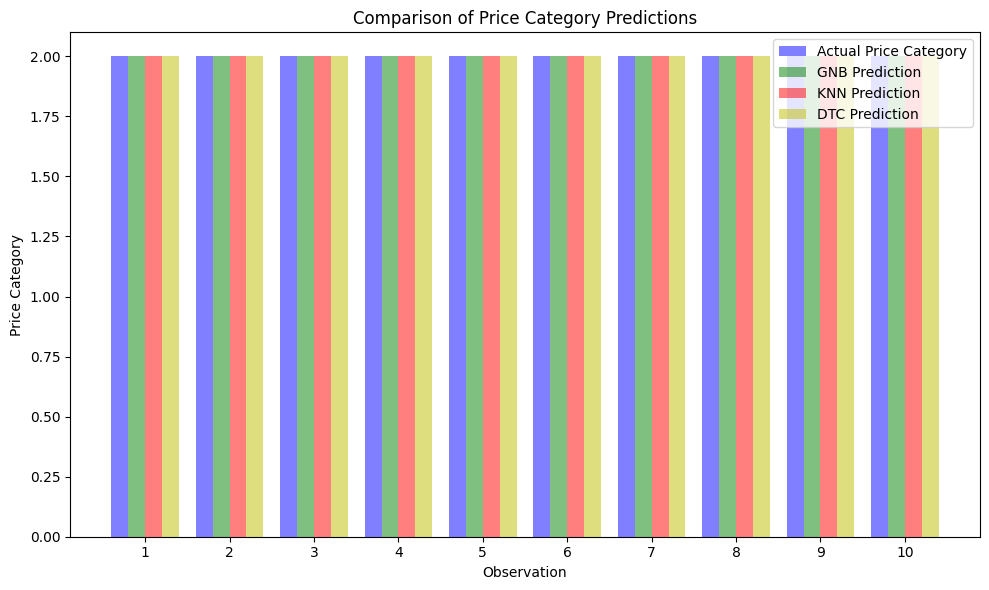

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

index = range(len(processor_speed))
bar_width = 0.2

plt.bar(index, price_category, bar_width, label='Actual Price Category', color='b', alpha=0.5)
plt.bar([i + bar_width for i in index], gnb_prediction, bar_width, label='GNB Prediction', color='g', alpha=0.5)
plt.bar([i + 2*bar_width for i in index], knn_prediction, bar_width, label='KNN Prediction', color='r', alpha=0.5)
plt.bar([i + 3*bar_width for i in index], dtc_prediction, bar_width, label='DTC Prediction', color='y', alpha=0.5)

plt.xlabel('Observation')
plt.ylabel('Price Category')
plt.title('Comparison of Price Category Predictions')
plt.xticks([i + 1.5 * bar_width for i in index], [i for i in range(1, len(processor_speed) + 1)])
plt.legend()
plt.tight_layout()

Pada gambar visualisasi diatas menunjukkan perbandingan antara kategori harga aktual dan prediksi yang dihasilkan oleh tiga algoritma klasifikasi: GNB, KNN, dan DTC.
Pada umumnya, ketiga algoritma tersebut menunjukkan performa yang cukup baik dalam memprediksi kategori harga.